
Anunay Minj


# You will work on Credit card fraud detection. Below are the points to be covered

Exploratory data analysis, Visual representations, outliers, imputations, correlation, imabalanced dataset, sampling, random, SMOTE, feature engineering, PCA, Classifiers, SVM, decision trees, XGBoost, logistic regression, accuracy and scores. Clustering


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
import os
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from scipy.stats import pearsonr
from scipy import stats
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn import svm, datasets
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
df= pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [ ]:
df.shape

(31780, 31)

In [ ]:
print("There are "+str(len(df))+ "  Rows and "+str(len(df.columns)) + "  columns in the given dataset" )


There are 25838  Rows and 31  columns in the given dataset


### Visual Representation

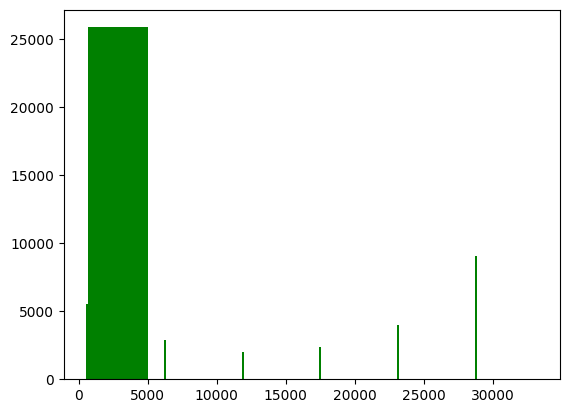

In [ ]:
plt.hist(df, 6, histtype='bar', facecolor='g')
plt.show()

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,25838.000000,25838.000000,25838.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,...,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000,25837.000000
mean,19376.128532,-0.225653,0.166976,0.723131,0.229368,-0.194354,0.079800,-0.128669,0.026060,0.441922,...,-0.037598,-0.132262,-0.039778,0.011174,0.129413,0.023418,0.013306,0.004153,75.808937,0.003406
std,11653.899424,1.889055,1.552796,1.684909,1.434242,1.436206,1.323018,1.319114,1.341622,1.269785,...,0.817316,0.641426,0.538789,0.590048,0.436213,0.516670,0.397674,0.280120,219.661154,0.058262
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,7694.750000,-0.951266,-0.405158,0.279675,-0.683788,-0.779682,-0.662365,-0.594982,-0.164442,-0.384700,...,-0.249309,-0.552080,-0.173949,-0.325263,-0.133337,-0.338941,-0.065269,-0.008898,6.060000,0.000000
50%,22684.000000,-0.267973,0.176509,0.862364,0.204882,-0.224921,-0.179636,-0.067756,0.029393,0.358908,...,-0.097962,-0.106938,-0.049040,0.063000,0.167170,-0.052787,0.007047,0.019985,18.960000,0.000000
75%,30231.500000,1.166499,0.818206,1.489349,1.109950,0.320600,0.466671,0.446339,0.287518,1.200785,...,0.072314,0.276513,0.075082,0.399042,0.410283,0.306226,0.091845,0.076753,67.610000,0.000000
max,33787.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


<ipython-input-14-14412076448d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0],kde=True)
<ipython-input-14-14412076448d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1],kde=True)


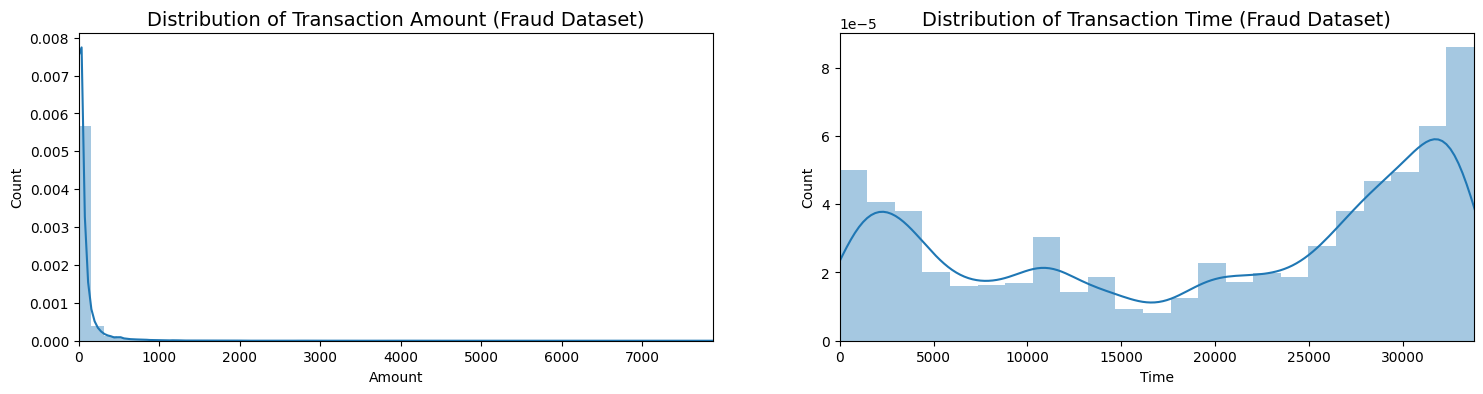

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0],kde=True)
ax[0].set_title('Distribution of Transaction Amount (Fraud Dataset)', fontsize=14)
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Count')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1],kde=True)
ax[1].set_title('Distribution of Transaction Time (Fraud Dataset)', fontsize=14)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Count')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

### Expunging Duplicated Values





In [ ]:
df[df['Class']==0].duplicated().sum()


100

In [ ]:
df[df['Class']==1].duplicated().sum()

0

In [ ]:
df[df['Class']==1].shape


(88, 31)

In [ ]:
df[df['Class']==0].shape

(25749, 31)

In [ ]:
df=df.drop('Time',axis=1)

In [ ]:
duplicate_rows = df.duplicated()
duplicate_df = df[duplicate_rows]
print(duplicate_df)

             V1        V2        V3        V4        V5        V6        V7  \
33    -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  0.711206   
35    -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983  0.693039   
113    1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
114    1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
115    1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
...         ...       ...       ...       ...       ...       ...       ...   
25640  1.248589 -0.071241  0.309541 -0.107431 -0.502085 -0.700542 -0.144766   
25692  1.252912  0.061057  0.104017  0.610006  0.033790 -0.088258  0.082107   
25694  1.276945  0.100769  0.117966  0.599901  0.046058 -0.092735  0.065599   
25749  1.195183  0.256923  0.164201  0.448700  0.043347 -0.087926 -0.095214   
25782  1.248589 -0.071241  0.309541 -0.107431 -0.502085 -0.700542 -0.144766   

             V8        V9       V10  ...       V21 

In [ ]:
df=df.drop_duplicates()

In [ ]:
sc=StandardScaler()

In [ ]:
df['Amount']=sc.fit_transform(df[['Amount']])

<Axes: xlabel='Class', ylabel='count'>

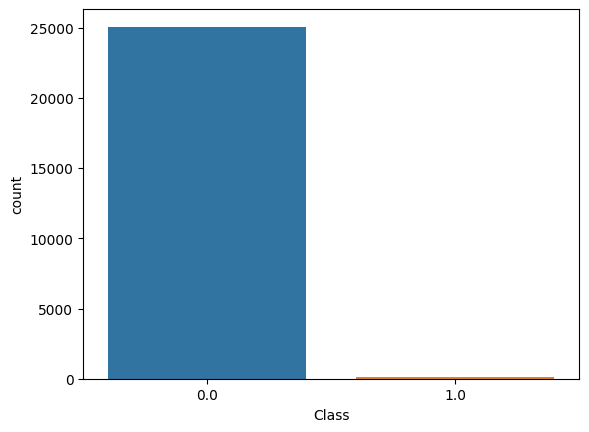

In [ ]:
# '0' = Non-fraud , '1' = fraud
sns.countplot(x='Class',data=df)

In [ ]:
## taking independent and dependent variable
y=df['Class']
x=df.drop('Class',axis=1)


### Managing NAN values!!

In [ ]:
# dropping NAN values(1 NAN value found)
y.fillna(y.median().round(1), inplace=True)

In [ ]:
x.fillna(x.median().round(1), inplace=True)

In [ ]:
x.shape

(25160, 29)

### Correlations

In [ ]:
cormat = df.corr()
round(cormat,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.00,-0.21,0.37,-0.12,0.15,0.12,0.24,-0.16,-0.03,0.05,...,-0.10,0.03,-0.04,-0.00,0.15,0.03,-0.15,0.13,-0.21,-0.26
V2,-0.21,1.00,-0.32,0.13,-0.19,-0.03,-0.11,0.09,-0.05,-0.03,...,0.03,-0.12,-0.00,-0.03,-0.09,-0.06,0.09,0.02,-0.48,0.23
V3,0.37,-0.32,1.00,-0.19,0.38,0.05,0.42,-0.35,0.19,0.24,...,-0.02,0.24,0.06,0.05,-0.18,0.06,-0.19,0.04,-0.15,-0.45
V4,-0.12,0.13,-0.19,1.00,-0.10,-0.03,-0.14,0.12,-0.07,-0.11,...,0.01,-0.02,-0.01,-0.01,-0.02,0.03,0.06,-0.02,0.11,0.25
V5,0.15,-0.19,0.38,-0.10,1.00,0.09,0.13,-0.18,0.05,0.19,...,-0.05,-0.06,0.04,-0.02,-0.08,-0.04,-0.14,-0.00,-0.36,-0.24
V6,0.12,-0.03,0.05,-0.03,0.09,1.00,0.12,-0.11,0.05,0.07,...,0.05,0.02,-0.01,-0.00,0.05,0.02,-0.03,-0.03,0.22,-0.12
V7,0.24,-0.11,0.42,-0.14,0.13,0.12,1.00,-0.16,0.07,0.23,...,-0.10,0.03,0.06,0.01,-0.13,-0.04,-0.15,-0.11,0.31,-0.36
V8,-0.16,0.09,-0.35,0.12,-0.18,-0.11,-0.16,1.00,-0.08,-0.16,...,-0.14,0.05,-0.09,0.00,0.04,-0.01,0.09,0.04,-0.06,0.19
V9,-0.03,-0.05,0.19,-0.07,0.05,0.05,0.07,-0.08,1.00,-0.00,...,-0.03,0.01,-0.03,-0.00,0.10,0.08,-0.06,-0.08,-0.01,-0.16
V10,0.05,-0.03,0.24,-0.11,0.19,0.07,0.23,-0.16,-0.00,1.00,...,0.00,-0.03,0.02,0.01,-0.01,0.00,-0.13,-0.09,-0.11,-0.35


In [ ]:
 #correaltion with absolute values
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.205636,0.374521,0.123498,0.147891,0.116118,0.237424,0.155091,0.025588,0.048677,0.061114,0.077696,0.011318,0.176907,0.042303,0.147526,0.129240,0.004173,0.020978,0.126551,0.096477,0.032639,0.041661,0.004571,0.152944,0.025119,0.148173,0.131403,0.210793,0.260897
V2,0.205636,1.000000,0.322352,0.134666,0.188989,0.032933,0.112359,0.087842,0.049684,0.026257,0.116691,0.132584,0.050002,0.122243,0.053012,0.080864,0.101596,0.011496,0.019458,0.054427,0.032144,0.120001,0.004034,0.027748,0.086805,0.058993,0.088178,0.021884,0.483315,0.234500
V3,0.374521,0.322352,1.000000,0.190037,0.378517,0.048738,0.418306,0.345838,0.185209,0.237617,0.158699,0.147268,0.004552,0.284923,0.161150,0.065198,0.210176,0.060710,0.034949,0.114821,0.020536,0.243162,0.056427,0.046280,0.182104,0.064840,0.190392,0.042538,0.154867,0.452040
V4,0.123498,0.134666,0.190037,1.000000,0.095178,0.034274,0.144901,0.117610,0.069911,0.106868,0.066779,0.132868,0.059150,0.103004,0.120326,0.178384,0.015294,0.030301,0.017447,0.026052,0.007014,0.019529,0.013680,0.011674,0.021253,0.031495,0.063788,0.020517,0.110524,0.247865
V5,0.147891,0.188989,0.378517,0.095178,1.000000,0.092192,0.128918,0.176299,0.046666,0.188049,0.073797,0.058944,0.043487,0.112488,0.063893,0.141344,0.091623,0.103511,0.005456,0.005509,0.054315,0.061441,0.038187,0.018146,0.083471,0.040495,0.139921,0.000481,0.361799,0.239534
V6,0.116118,0.032933,0.048738,0.034274,0.092192,1.000000,0.123606,0.106699,0.050486,0.069336,0.102189,0.005706,0.025290,0.099238,0.124241,0.027327,0.050737,0.053442,0.092851,0.019639,0.045518,0.016159,0.005639,0.000048,0.053554,0.017097,0.027641,0.031431,0.223389,0.115260
V7,0.237424,0.112359,0.418306,0.144901,0.128918,0.123606,1.000000,0.157415,0.068229,0.234955,0.151538,0.203582,0.020447,0.129396,0.077997,0.163421,0.187690,0.122635,0.049038,0.032735,0.104897,0.029087,0.057803,0.009800,0.126199,0.037010,0.153568,0.105317,0.312497,0.364257
V8,0.155091,0.087842,0.345838,0.117610,0.176299,0.106699,0.157415,1.000000,0.082342,0.162977,0.032249,0.089033,0.009488,0.084152,0.012552,0.062438,0.097529,0.042851,0.022254,0.048802,0.141709,0.046821,0.088251,0.004967,0.043881,0.010491,0.088340,0.039151,0.059160,0.190084
V9,0.025588,0.049684,0.185209,0.069911,0.046666,0.050486,0.068229,0.082342,1.000000,0.003233,0.097177,0.266350,0.270584,0.286844,0.229704,0.055576,0.251357,0.132871,0.060659,0.013260,0.031072,0.005818,0.027033,0.001433,0.099316,0.077211,0.059204,0.079317,0.008441,0.159403
V10,0.048677,0.026257,0.237617,0.106868,0.188049,0.069336,0.234955,0.162977,0.003233,1.000000,0.152493,0.240590,0.103955,0.050808,0.085822,0.224415,0.212207,0.077361,0.009418,0.035317,0.002502,0.030662,0.021772,0.014685,0.011149,0.004545,0.133782,0.088386,0.111590,0.345064


<Axes: >

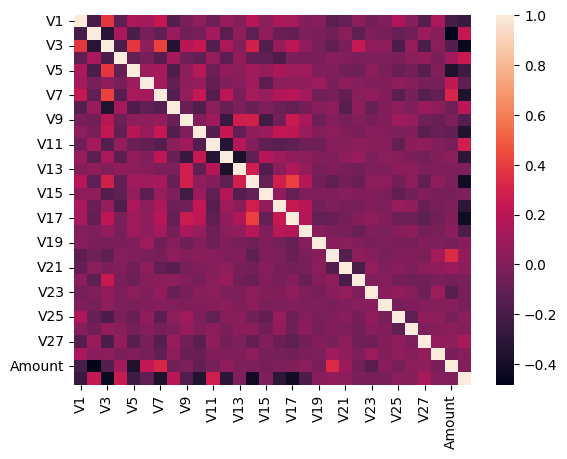

In [ ]:
sns.heatmap(cormat)

### SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
#Taking small dataset initially
x= x.iloc[0:10000,]
y=y.iloc[0:10000,]

In [ ]:
x_res,y_res=sm.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [ ]:
#Random Forest Classifier
model1 = RandomForestClassifier()


In [ ]:
#Decision Tree Classifier
model2 =  tree.DecisionTreeClassifier()

In [ ]:
#Logistic Regression
model3 = LogisticRegression()

### Training Models


In [ ]:
model1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model3.fit(x_train, y_train)

LogisticRegression()

### Accuracy Scores and reports

In [ ]:
model1.score(x_test, y_test)

1.0

In [ ]:
model2.score(x_test, y_test)

0.9994981179422836

In [ ]:
model3.score(x_test, y_test)

0.9994981179422836

In [ ]:
y_pred1= model1.predict(x_test)

In [ ]:
y_pred2= model2.predict(x_test)

In [ ]:
y_pred3= model3.predict(x_test)

In [ ]:
report1=classification_report(y_test,y_pred1)

In [ ]:
report2=classification_report(y_test,y_pred2)

In [ ]:
report3=classification_report(y_test,y_pred3)

In [ ]:
print(report1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1995
         1.0       1.00      1.00      1.00      1990

    accuracy                           1.00      3985
   macro avg       1.00      1.00      1.00      3985
weighted avg       1.00      1.00      1.00      3985



In [ ]:
print(report2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1995
         1.0       1.00      1.00      1.00      1990

    accuracy                           1.00      3985
   macro avg       1.00      1.00      1.00      3985
weighted avg       1.00      1.00      1.00      3985



In [ ]:
print(report3)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1995
         1.0       1.00      1.00      1.00      1990

    accuracy                           1.00      3985
   macro avg       1.00      1.00      1.00      3985
weighted avg       1.00      1.00      1.00      3985



In [ ]:
accuracy_score(y_test, y_pred1)

1.0

In [ ]:
accuracy_score(y_test, y_pred2)

0.9994981179422836

In [ ]:
accuracy_score(y_test, y_pred3)

0.9994981179422836

### Support Vector Machine model with Scikit-Learn

In [ ]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [ ]:
t0 = time.time()
sklearn_svm.fit(x_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  0.14


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
prediction=sklearn_svm.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

confusion_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 0.9894604767879548
Confusion Matrix:
[[1953   42]
 [   0 1990]]


### Classifier

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
KNN_prediction = KNN_model.predict(x_test)

In [ ]:
print(accuracy_score(KNN_prediction, y_test))

0.9994981179422836


In [ ]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1992

    accuracy                           1.00      3985
   macro avg       1.00      1.00      1.00      3985
weighted avg       1.00      1.00      1.00      3985



### PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

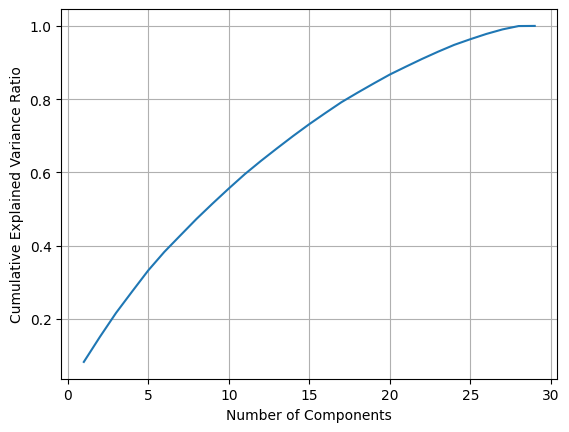

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
n_components = 2
X_transformed = pca.transform(X_scaled)[:, :n_components]

In [ ]:
knn_without_pca = KNeighborsClassifier()
knn_without_pca.fit(x_train, y_train)
accuracy_without_pca = knn_without_pca.score(x_test, y_test)

print("Accuracy without PCA:", accuracy_without_pca)

Accuracy without PCA: 0.9994981179422836


In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

knn_with_pca = KNeighborsClassifier()
knn_with_pca.fit(x_train_pca, y_train_pca)
accuracy_with_pca = knn_with_pca.score(x_test_pca, y_test_pca)

print("Accuracy with PCA:", accuracy_with_pca)

Accuracy with PCA: 0.9975
